In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os 
import PIL
import tensorflow as tf
import pandas as pd

In [2]:
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 

In [3]:
df = pd.read_csv('../matjari/data/matjari-dataset-cleaned.csv', sep='\t')
df.columns = ['Product Label','url']

In [4]:
df

,Product Label,url
0,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...
1,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...
2,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...
3,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...
4,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...
...,...,...
10714,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...
10715,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...
10716,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...
10717,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...


In [5]:
import os, json
import pandas as pd

path_to_json = "../raw_data/ALL Pictures"
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)  # for me this prints ['foo.json']


['000012551.json', '000001687.json', '000006142.json', '000000995.json', '000004485.json', '000003340.json', '000010096.json', '000012101.json', '000006512.json', '000003710.json', '000002802.json', '000007753.json', '000000096.json', '000006841.json', '000002551.json', '000005294.json', '000010995.json', '000011687.json', '000012802.json', '000007303.json', '000002101.json', '000000429.json', '000002414.json', '000008019.json', '000011238.json', '000007616.json', '000006904.json', '000004939.json', '000005781.json', '000000079.json', '000002044.json', '000004893.json', '000011392.json', '000008449.json', '000012947.json', '000011668.json', '000000583.json', '000007246.json', '000003205.json', '000001238.json', '000009608.json', '000010429.json', '000012414.json', '000006007.json', '000003655.json', '000004190.json', '000001668.json', '000002947.json', '000010583.json', '000009258.json', '000010079.json', '000012044.json', '000006457.json', '000001392.json', '000009872.json', '00000876

In [6]:
jsons_data = pd.DataFrame(columns=["url", "key", "status", "error_message", "width", "height", "original_width", "original_height", "exif", "md5"])

In [7]:
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        # here you need to know the layout of your json and each json has to have
        # the same structure (obviously not the structure I have here)
        url = json_text["url"]
        key = json_text["key"]
        status = json_text["status"]
        error_message = json_text["error_message"]
        width = json_text["width"]
        height = json_text["height"]
        original_width = json_text["original_width"]
        original_height = json_text["original_height"]
        exif = json_text["exif"]
        md5 = json_text["md5"]
        # here I push a list of data into a pandas DataFrame at row given by 'index'
        jsons_data.loc[index] = [url, key, status, error_message, width, height, original_width, original_height, exif, md5]

# now that we have the pertinent json data in our DataFrame let's look at it
print(jsons_data)

                                                     url        key   status  \
0      https://cdn.shopify.com/s/files/1/0050/7478/02...  000012551  success   
1      https://cdn.shopify.com/s/files/1/0050/7478/02...  000001687  success   
2      https://cdn.shopify.com/s/files/1/0050/7478/02...  000006142  success   
3      https://cdn.shopify.com/s/files/1/0050/7478/02...  000000995  success   
4      https://cdn.shopify.com/s/files/1/0050/7478/02...  000004485  success   
...                                                  ...        ...      ...   
12876  https://cdn.shopify.com/s/files/1/0050/7478/02...  000011885  success   
12877  https://cdn.shopify.com/s/files/1/0050/7478/02...  000010797  success   
12878  https://cdn.shopify.com/s/files/1/0050/7478/02...  000012600  success   
12879  https://cdn.shopify.com/s/files/1/0050/7478/02...  000006213  success   
12880  https://cdn.shopify.com/s/files/1/0050/7478/02...  000003011  success   

      error_message  width  height  ori

In [8]:
df2 = pd.DataFrame(jsons_data)
df2

,url,key,status,error_message,width,height,original_width,original_height,exif,md5
0,https://cdn.shopify.com/s/files/1/0050/7478/02...,000012551,success,None,256,256,980,980,"{""Image Orientation"": ""Horizontal (normal)"", ""...",4372720c68fc00cab313a02fda544caf
1,https://cdn.shopify.com/s/files/1/0050/7478/02...,000001687,success,None,256,256,736,736,"{""Image HostComputer"": ""imagery4""}",992d3a4ab9dc0d8e62813cb7718f7aa2
2,https://cdn.shopify.com/s/files/1/0050/7478/02...,000006142,success,None,256,256,3166,3166,"{""Image Orientation"": ""Horizontal (normal)"", ""...",b178b7dda33b896951dc897fa475da58
3,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000995,success,None,256,256,3024,3024,"{""Image HostComputer"": ""imagery4""}",b9a9238ac262c15704b45c39ae967c66
4,https://cdn.shopify.com/s/files/1/0050/7478/02...,000004485,success,None,256,256,1080,909,{},71be8453e6a4f537061951980ffd0a39
...,...,...,...,...,...,...,...,...,...,...
12876,https://cdn.shopify.com/s/files/1/0050/7478/02...,000011885,success,None,256,256,1080,1080,"{""Image HostComputer"": ""imagery4""}",13ffec19cfbd045c01771b426fbfc335
12877,https://cdn.shopify.com/s/files/1/0050/7478/02...,000010797,success,None,256,256,2724,2724,{},927bfa06f4b71696363cfcb532c4ef3e
12878,https://cdn.shopify.com/s/files/1/0050/7478/02...,000012600,success,None,256,256,960,1280,"{""Image HostComputer"": ""imagery4""}",87ea7b24f65ef1b6788c42f46e96e6f6
12879,https://cdn.shopify.com/s/files/1/0050/7478/02...,000006213,success,None,256,256,2621,3931,"{""Image Orientation"": ""Horizontal (normal)"", ""...",72f81efedb8c6a78b66159be8e9f5fcc


In [9]:
df_merge = df.merge(df2, how='inner', on='url')

In [10]:
df_merge

,Product Label,url,key,status,error_message,width,height,original_width,original_height,exif,md5
0,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000122,success,None,256,256,2635,2635,"{""Image HostComputer"": ""imagery4""}",fec4543742d91ac05bfeba542ddd56a0
1,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000123,success,None,256,256,2955,2955,"{""Image HostComputer"": ""imagery4""}",0fb2b60db41b798608302f23d2283415
2,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000133,success,None,256,256,1280,1280,"{""Image HostComputer"": ""imagery4""}",517d74b620b8cbd2b558deffed97552e
3,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000134,success,None,256,256,960,1280,"{""Image HostComputer"": ""imagery4""}",d195b0f6a2c393c1df0f1c2b677045ed
4,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000135,success,None,256,256,960,960,"{""Image HostComputer"": ""imagery4""}",bac44b98f1b11d427b150b770c0e18ef
...,...,...,...,...,...,...,...,...,...,...,...
12840,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000164,success,None,256,256,1083,1083,"{""Image HostComputer"": ""imagery4""}",f137cd70c01109331de820c4c15e6ef2
12841,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...,000008498,success,None,256,256,768,769,"{""Image HostComputer"": ""imagery4""}",506d4f3f4afa27db5a5941f718260b52
12842,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...,000008499,success,None,256,256,454,454,"{""Image HostComputer"": ""imagery4""}",b233348b580065e922b003e40ae3b49f
12843,Wallet,https://cdn.shopify.com/s/files/1/0050/7478/02...,000008500,success,None,256,256,727,726,"{""Image HostComputer"": ""imagery4""}",ab20936b6e474e0c48652a0c0d07b810


In [11]:
from PIL import Image
import numpy as np
from numpy import asarray
X = []
for i in range(0, len(df_merge)):
    img = Image.open('../raw_data/ALL Pictures/' + str(df_merge['key'][i]) + '.jpg')
    img_array = asarray(img)
    X.append(img_array)

In [12]:
X[0].shape

(256, 256, 3)

In [13]:
df_merge['X'] = X

In [14]:
df_merge.head(10)

,Product Label,url,key,status,error_message,width,height,original_width,original_height,exif,md5,X
0,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000122,success,None,256,256,2635,2635,"{""Image HostComputer"": ""imagery4""}",fec4543742d91ac05bfeba542ddd56a0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000123,success,None,256,256,2955,2955,"{""Image HostComputer"": ""imagery4""}",0fb2b60db41b798608302f23d2283415,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000133,success,None,256,256,1280,1280,"{""Image HostComputer"": ""imagery4""}",517d74b620b8cbd2b558deffed97552e,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000134,success,None,256,256,960,1280,"{""Image HostComputer"": ""imagery4""}",d195b0f6a2c393c1df0f1c2b677045ed,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000135,success,None,256,256,960,960,"{""Image HostComputer"": ""imagery4""}",bac44b98f1b11d427b150b770c0e18ef,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
5,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000136,success,None,256,256,500,500,"{""Image HostComputer"": ""imagery4""}",fc6830524fc98b5fc263b162eb4ba4f9,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000137,success,None,256,256,960,960,"{""Image HostComputer"": ""imagery4""}",492373dafb98dcaa0a1c26057d7a2a80,"[[[41, 152, 101], [41, 152, 101], [41, 152, 10..."
7,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000138,success,None,256,256,960,960,"{""Image HostComputer"": ""imagery4""}",5df6f0df5d026979a4f6c22e5d0867e9,"[[[48, 162, 100], [48, 162, 100], [48, 162, 10..."
8,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000177,success,None,256,256,2000,2000,"{""Image HostComputer"": ""imagery4""}",392b5af43cd2376b2edaa32f96d27a89,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
9,Bag,https://cdn.shopify.com/s/files/1/0050/7478/02...,000000178,success,None,256,256,2000,2000,"{""Image HostComputer"": ""imagery4""}",20b073c747b49ce2f04f0a200ed1284c,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [21]:
df_merge.to_csv('df_images.csv')

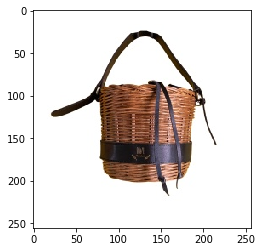

In [15]:
from matplotlib import pyplot as plt
plt.imshow(X[0], interpolation='nearest')
plt.show()

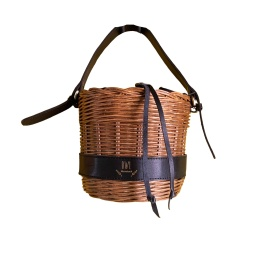

In [24]:
img = Image.fromarray(X[0], 'RGB')
img

In [26]:
data_augmentation=keras.Sequential([ layers.experimental.preprocessing.RandomZoom(0.9), ])

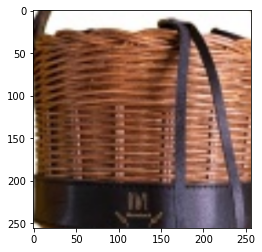

In [27]:
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8"))

In [33]:
data_augmentation_contrast=keras.Sequential([ layers.experimental.preprocessing.RandomContrast(0.1), ])

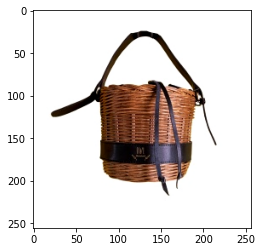

In [34]:
plt.imshow(data_augmentation_contrast(X[0]).numpy().astype("uint8"))

In [35]:
data_augmentation=keras.Sequential([layers.experimental.preprocessing.RandomFlip,
                                    layers.experimental.preprocessing.RandomZoom(0.1),
                                    layers.experimental.preprocessing.RandomContrast(0.1),
                                    ])

NameError: name 'img_height' is not defined